<a href="https://colab.research.google.com/github/sushmith3010/bioinformatic_predicting_solubility/blob/main/cheminformatics_predicting_solubility_2_2_PyCaret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cheminformatics in Python [PART 2.2] Predicting Solubility of Molecules using PyCaret | End-to-End Data Science Project**

In this Jupyter notebook, we will continue our journey into the world of Cheminformatics (i.e. lies at the interface of Informatics and Chemistry) by simplifying this notebook via the use of the low-code machine learning library PyCaret.


**Information from the previous notebook:**

We will be reproducing a research article (by John S. Delaney$^1$) by applying Linear Regression to predict the solubility of molecules (i.e. solubility of drugs is an important physicochemical property in Drug discovery, design and development).

This idea for this notebook was inspired by the excellent blog post by Pat Walters$^2$ where he reproduced the linear regression model with similar degree of performance as that of Delaney. This example is also briefly described in the book ***Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More***.$^3$

## **1. Install PyCaret**

In [1]:
! pip install pycaret

## **2. Read in dataset**

In [2]:
import pandas as pd

In [3]:
delaney_with_descriptors_url = 'https://raw.githubusercontent.com/sushmith3010/bioinformatic_predicting_solubility/refs/heads/main/delaney_solubility_with_descriptors.csv'
dataset = pd.read_csv(delaney_with_descriptors_url)

In [4]:
dataset

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


## **3. Model Building**

### **3.1. Model Setup**

In [5]:
!pip install --upgrade pycaret

In [6]:
from pycaret.regression import *

In [7]:
model = setup(data=dataset, target='logS', train_size=0.8, session_id=123)

,Description,Value
0,Session id,123
1,Target,logS
2,Target type,Regression
3,Original data shape,"(1144, 5)"
4,Transformed data shape,"(1144, 5)"
5,Transformed train set shape,"(915, 5)"
6,Transformed test set shape,"(229, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


### **3.2. Model comparison**

Subsequent blocks of codes here will be using the ``training set`` (the 80% subset) for model building.

In [8]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5351,0.5613,0.7451,0.8679,0.2014,0.6333,0.2160
rf,Random Forest Regressor,0.5504,0.5814,0.7572,0.8634,0.2035,0.6267,0.3170
lightgbm,Light Gradient Boosting Machine,0.5706,0.6043,0.7721,0.8580,0.2150,0.7114,0.7990
gbr,Gradient Boosting Regressor,0.5916,0.6189,0.7806,0.8543,0.2150,0.6717,0.2270
xgboost,Extreme Gradient Boosting,0.5696,0.6450,0.7978,0.8479,0.2165,0.6829,0.1120
ada,AdaBoost Regressor,0.7001,0.8195,0.9011,0.8070,0.2494,0.7712,0.1560
dt,Decision Tree Regressor,0.6830,0.9120,0.9493,0.7815,0.2487,0.7842,0.0220
br,Bayesian Ridge,0.7627,0.9962,0.9931,0.7623,0.2837,0.7959,0.0190
lar,Least Angle Regression,0.7620,0.9962,0.9932,0.7623,0.2839,0.7953,0.0200
ridge,Ridge Regression,0.7621,0.9961,0.9931,0.7623,0.2838,0.7954,0.0720


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

ExtraTreesRegressor(n_jobs=-1, random_state=123)

### **3.3. Model Creation**

In [9]:
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.5687,0.7427,0.8618,0.8486,0.2071,0.3639
1,0.5037,0.4929,0.7020,0.8987,0.2194,0.4050
2,0.5352,0.4944,0.7031,0.8616,0.2279,0.3287
3,0.5603,0.6111,0.7817,0.8529,0.2172,0.3185
4,0.5614,0.6130,0.7830,0.8815,0.2118,2.3217
5,0.5693,0.7705,0.8778,0.8039,0.2417,1.1786
6,0.5192,0.4616,0.6794,0.8909,0.1871,0.2315
7,0.5329,0.5604,0.7486,0.8882,0.1579,0.2261
8,0.4799,0.3782,0.6150,0.8952,0.1711,0.3382


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### **3.4. Model Tuning**

The learning parameters are subjected to optimization at this phase. Here, 50 iterations is used for the optimization process and the fitness function is the Mean Absolute Error (MAE) which is the performance metric used to judge at which learning parameter settings are optimal.

In [10]:
tuned_et = tune_model(et, n_iter = 50, optimize = 'mae')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6669,0.8071,0.8984,0.8354,0.2329,0.4947
1,0.5719,0.5806,0.7620,0.8807,0.2315,0.4728
2,0.6088,0.6004,0.7748,0.8319,0.2275,0.4917
3,0.6391,0.6740,0.8210,0.8377,0.2270,0.4096
4,0.5998,0.6712,0.8193,0.8702,0.2141,2.3939
5,0.5943,0.7894,0.8885,0.7991,0.2446,1.2522
6,0.5821,0.5209,0.7217,0.8769,0.2133,0.2897
7,0.6551,0.6968,0.8348,0.8610,0.1859,0.3685
8,0.5690,0.5053,0.7108,0.8600,0.2160,0.5232


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [11]:
print(tuned_et)

ExtraTreesRegressor(n_jobs=-1, random_state=123)


### **4. Model Analysis**

#### **4.1. Plot Models**
In this tutorial, we are performing regression and so further details of the regression plots are available at https://pycaret.org/plot-model/.

**Residuals Plot**

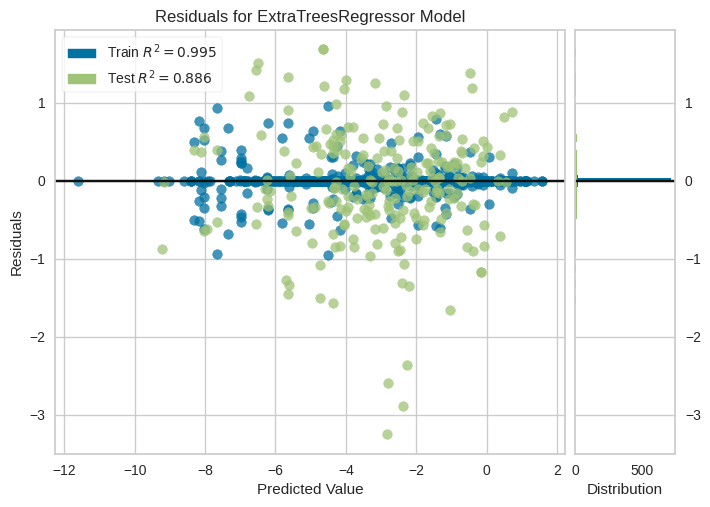

In [12]:
plot_model(et, 'residuals')

**Prediction Error Plot**

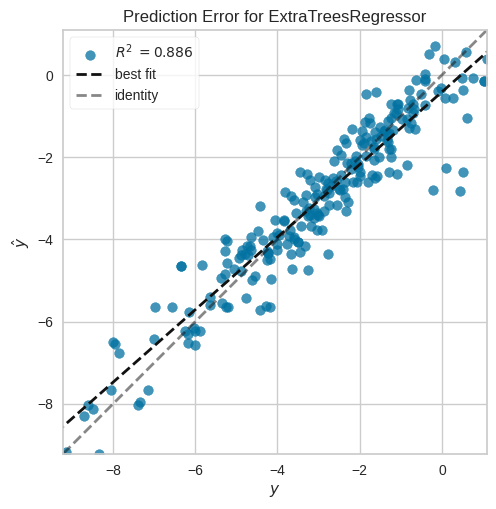

In [13]:
plot_model(et, 'error')

**Cooks Distance Plot**

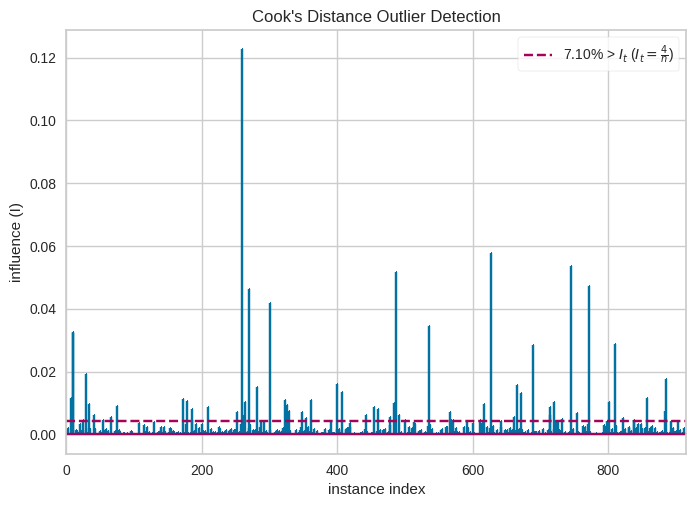

In [14]:
plot_model(et, 'cooks')

**Recursive Feature Selection**

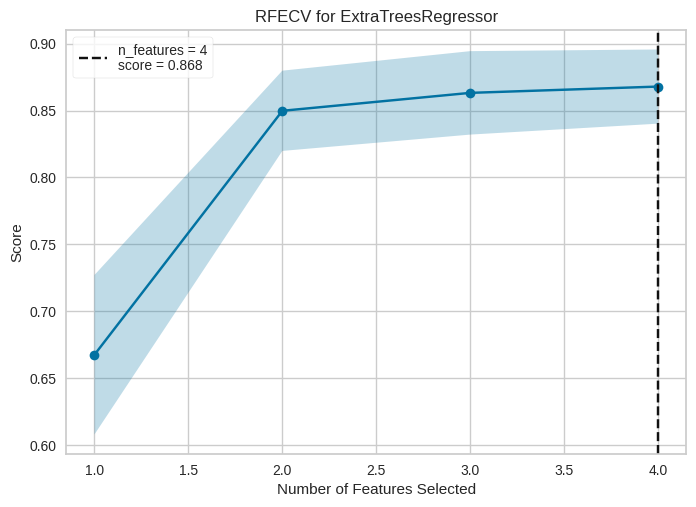

In [15]:
plot_model(et, 'rfe')

**Learning Curve**

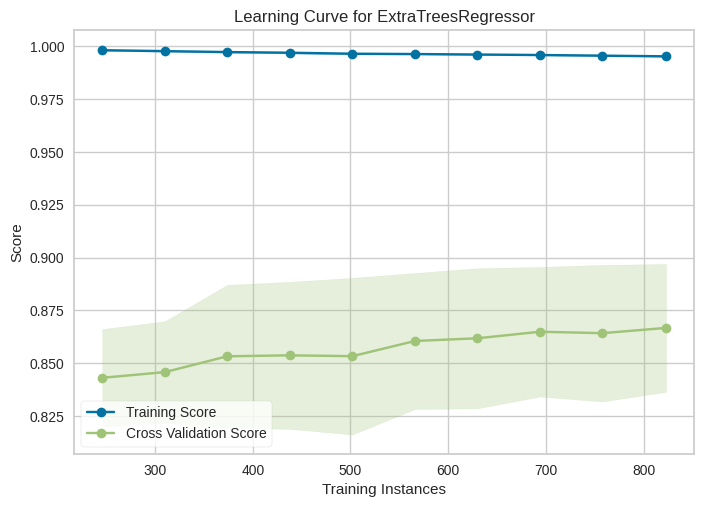

In [16]:
plot_model(et, 'learning')

**Validation Curve**

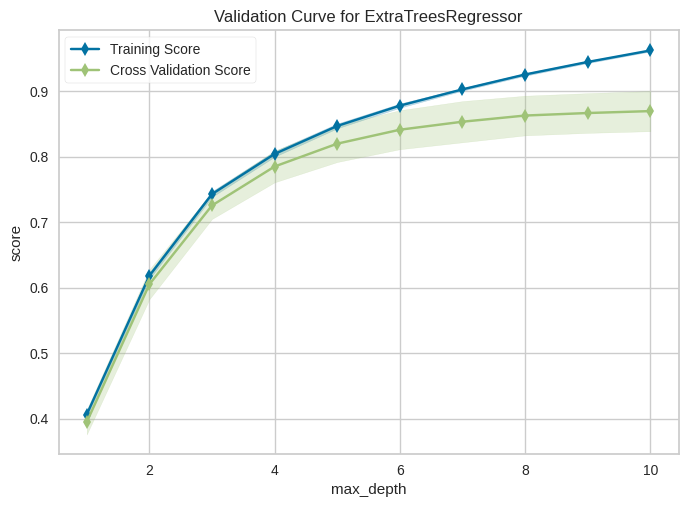

In [17]:
plot_model(et, 'vc')

**Manifold Learning**

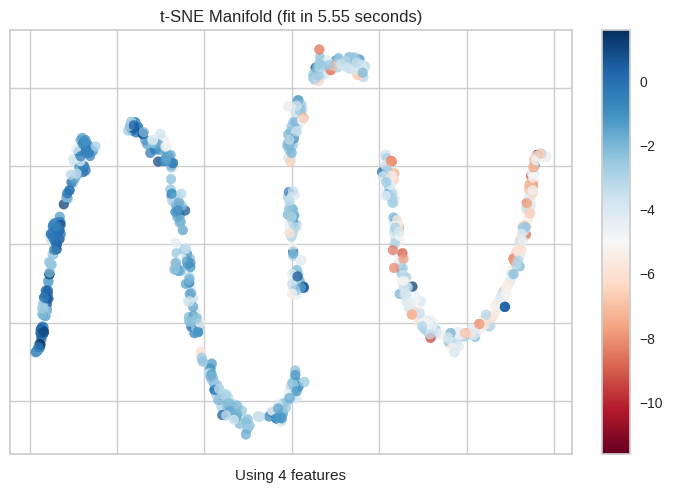

In [18]:
plot_model(et, 'manifold')

**Feature Importance**

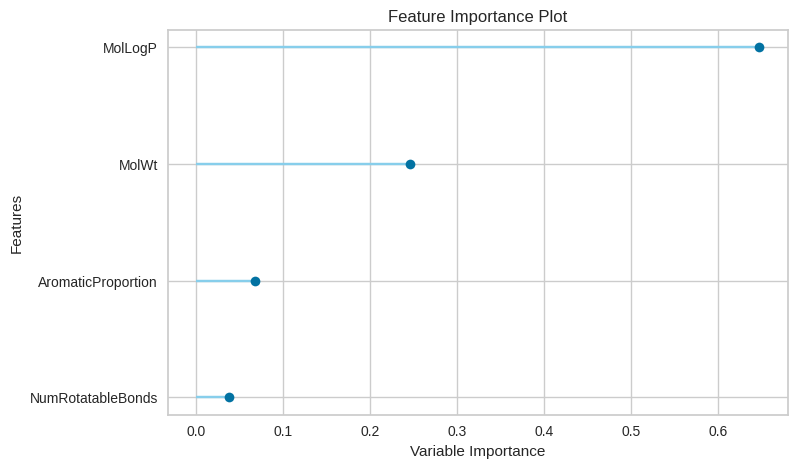

In [19]:
plot_model(et, 'feature')

**Model Hyperparameter**

The hyperparameter of the learning model is displayed using the ``parameter`` argument in inside the ``plot_model()`` function.

In [20]:
plot_model(et, 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,squared_error
max_depth,None
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2


Here, the hyperparameter of the tuned model is displayed below.

In [21]:
plot_model(tuned_et, 'parameter')

,Parameters
bootstrap,False
ccp_alpha,0.0
criterion,squared_error
max_depth,None
max_features,1.0
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1
min_samples_split,2


**Show all plots**

The ``evaluate_model()`` displays all available plots here.

In [22]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

#### **4.2. Model Interpretaion**

The ``interpret_model()`` function of PyCaret leverages the use of the SHAP library to produce stunning plots for depicting the **SHAP (SHapley Additive exPlanations)** values that was originally proposed by Lundberg and Lee in 2016.$^5$ In a nutshell, SHAP plots adds interpretability to constructed models so that the contribution of each features to the prediction can be elucidated.

**Summary Plot**

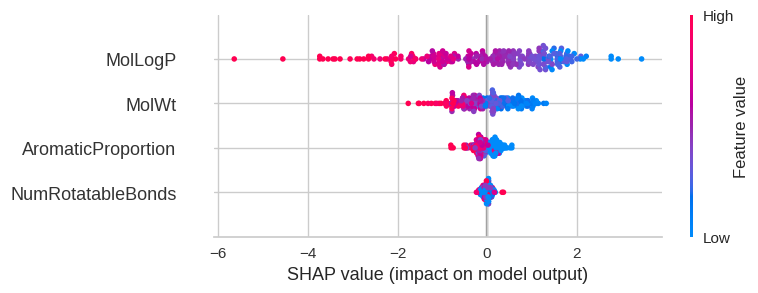

In [23]:
interpret_model(et)

**Correlation Plot**

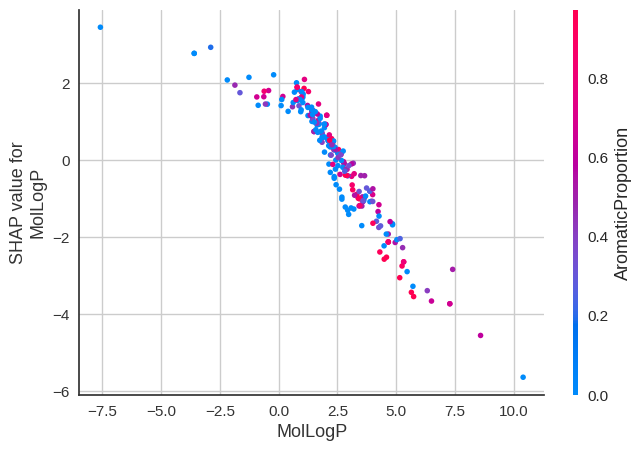

In [24]:
interpret_model(et, plot = 'correlation')

**Reason Plot at Observation Level**

The *Reason Plot at Observation Level* as called by PyCaret is better known as the **force plot** and this plot essentially describes the ***push and pull effect*** that each individual features has on the **base value** that eventually leads to the predicted **output value**.

In [25]:
interpret_model(et, plot = 'reason', observation = 10)

### **6.6. External Testing**

We will now apply the trained model (built with 80% subset) to evaluate on the so-called **"hold-out"** testing set (the 20% subset) that serves as the unseen data.

In [26]:
prediction_holdout = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.5274,0.5197,0.7209,0.8865,0.2247,0.6881


In [27]:
prediction_holdout.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS,prediction_label
681,5.26898,349.429993,5.0,0.461538,-6.025,-6.157980
373,1.84570,360.450012,3.0,0.000000,-3.850,-3.561360
541,2.09160,128.214996,0.0,0.000000,-1.290,-1.791243
381,1.84560,227.337006,5.0,0.400000,-3.040,-3.782360
141,1.02480,88.150002,0.0,0.000000,-0.400,-0.154910


---

## **Reference**

1. John S. Delaney. [ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure](https://pubs.acs.org/doi/10.1021/ci034243x). ***J. Chem. Inf. Comput. Sci.*** 2004, 44, 3, 1000-1005.

2. Pat Walters. [Predicting Aqueous Solubility - It's Harder Than It Looks](http://practicalcheminformatics.blogspot.com/2018/09/predicting-aqueous-solubility-its.html). ***Practical Cheminformatics Blog***

3. Bharath Ramsundar, Peter Eastman, Patrick Walters, and Vijay Pande. [Deep Learning for the Life Sciences: Applying Deep Learning to Genomics, Microscopy, Drug Discovery, and More](https://learning.oreilly.com/library/view/deep-learning-for/9781492039822/), O'Reilly, 2019.

4. [Supplementary file](https://pubs.acs.org/doi/10.1021/ci034243x) from Delaney's ESOL:  Estimating Aqueous Solubility Directly from Molecular Structure.

5. Scott M. Lundberg and Su-In Lee. [A Unified Approach to Interpreting Model Predictions](https://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions), A Unified Approach to Interpreting Model Predictions, ***Advances in Neural Information Processing Systems 30 (NIPS 2017)***, 2017.